In [1]:
import lda
import pandas as pd
import numpy as np
import json

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import re

import pyLDAvis.sklearn
import pyLDAvis

from lda import (
  get_text,
  lda_preprocess,
  lda_gridsearch,
  lda_topic_modeling,
  major_topic_per_doc,
  plot_top_words,
  show_topics,
)

In [3]:
# load squad, otquad
# get only the contexts
# each context is a document
# create a dataframe with both of them with a column named data_name
# run lda

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
a = json.load(open('/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/otquad/all_cpg_unsup.json'))

len(np.unique([x['context'] for x in a['data'][0]['paragraphs']]))

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10668

In [71]:
df = pd.DataFrame()
df['context'] = [x['context'] for x in a['data'][0]['paragraphs']]
df['question'] = [x['qas'][0]['question'] for x in a['data'][0]['paragraphs']]
df['answer'] = [x['qas'][0]['answers'][0]['text'] for x in a['data'][0]['paragraphs']]


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df.sample(5)

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,context,question,answer
6477,In the Evaluation of Galcanezumab in the Preve...,[MASK],
10201,scores divide patients into risk groups that h...,[MASK],
466,Discussion Evidence suggests aerobic exercise ...,[MASK],
5839,Discussion The systematic evidence review for ...,[MASK],
240,Using these four domains the Work Group determ...,[MASK],


In [75]:
# df = pd.read_csv('../data/otquad-v1.0 - Sheet1.csv')[['title', 'context',
#                                                       'question', 'answer']]

# print(len(df))
# print(f"Number of Unique Contexts   : {df['context'].nunique()}")
# print(f"Ratio of QA Pair-to-Context : {len(df)/df['context'].nunique()}")

# df['context_length'] = df['context'].apply(len)
# df['question_length'] = df['question'].apply(len)
# df['answer_length'] = df['answer'].apply(len)


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# squad_path  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/bioasq/test_bioasq9b.json'
squad_path  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/squad/test_squad.json'
# squad_path  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/emrqa/datasets/relation-dev.json'
# squad_path  = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/emrqa/test_emrqa.json'

a = json.load(open(squad_path))

squad_contexts  = []
for d in a['data']:
  for p in d['paragraphs']:
    squad_contexts.append(p['context'])
    
print(len(squad_contexts))
print(len(np.unique(squad_contexts)))

2067
2067


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
otquad_contexts = df['context'].values.tolist()
print(len(otquad_contexts))
print(len(np.unique(otquad_contexts)))

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12084
10668


In [78]:
squad_contexts  = np.unique(squad_contexts)
otquad_contexts = np.unique(otquad_contexts)

print(len(squad_contexts), len(otquad_contexts))

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2067 10668


In [79]:
df_squad = pd.DataFrame()
df_squad['contexts'] = squad_contexts
df_squad['data_name'] = ['squad']*len(squad_contexts)
df_squad.shape

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2067, 2)

In [81]:
df_otquad = pd.DataFrame()
df_otquad['contexts'] = otquad_contexts
df_otquad['data_name'] = ['otquad']*len(otquad_contexts)
if df_otquad.shape[0] < df_squad.shape[0]:
  df_squad = df_squad.sample(df_otquad.shape[0])
df_squad.shape, df_otquad.shape

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((2067, 2), (10668, 2))

In [82]:
df = df_squad.append(df_otquad, ignore_index = True)
df

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,contexts,data_name
0,Seamans' establishment of an ad-hoc committee...,squad
1,"""Bairn"" and ""hyem"", meaning ""child"" and ""home""...",squad
2,"""Official"" reconstructions have also been rele...",squad
3,"""Southern California"" is not a formal geograph...",squad
4,"""The Islamic State"", formerly known as the ""Is...",squad
...,...,...
12730,ο Change in monthly headache days ο Change i...,otquad
12731,ο Degree of pain reduction ο Time to relief ...,otquad
12732,ο Ergotamine ο Dihydroergotamine ο Ketamine...,otquad
12733,ο Headache severity e.g. MIDAS ο Rates of de...,otquad


In [83]:
text = df['contexts'].values.tolist()

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
len(text)

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12735

In [85]:
n_features = None
n_top_words = 20
n_words = 10

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extracting features for LDA . . .
Starting gridsearch for LDA . . .
Ending gridsearch for LDA . . .


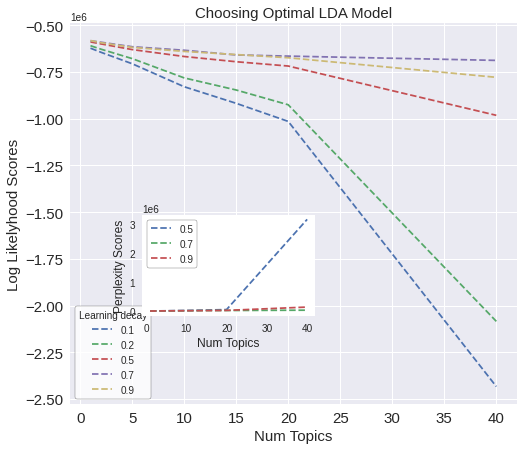

In [86]:
# vectorizer
vectorizer, vectors, feature_names = lda_preprocess(text, n_features=n_features)

# lda gridsearch
lda_gridsearch(vectors)


In [87]:
# best topic model

n_components = 2
learning_decay = 0.1

model = lda_topic_modeling(vectors, n_components, learning_decay, n_top_words)


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


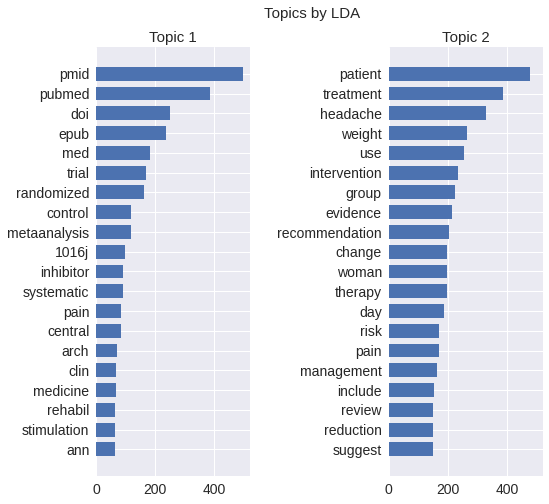

In [88]:
# topic words, document distribution, plot top 10 words in each topic

df_document_topics, df_topic_distribution, df_topic_keywords = major_topic_per_doc(model, vectors, 
                                                                                   vectorizer, text)

plot_top_words(model, feature_names, n_top_words, 1, n_components, (8, 7))
    
df_topic_keywords = show_topics(vectorizer, model, n_words=n_words)


In [89]:
df['topic_number'] = df_document_topics.data['dominant_topic'].values.tolist()

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
df_s = df[df['data_name']=='squad']
df_b = df[df['data_name']=='otquad']
print(df_s.shape, df_b.shape)

(2067, 3) (10668, 3)


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
total_s = df_s.shape[0] 
total_b = df_b.shape[0]

print(f'Ratio of topic-0 in SQuAD: {(df_s.topic_number.value_counts()[0]/total_s)*100}')
print(f'Ratio of topic-1 in SQuAD: {(df_s.topic_number.value_counts()[1]/total_s)*100}')
print('\n')
print(f'Ratio of topic-0 in OTQuAD: {(df_b.topic_number.value_counts()[0]/total_b)*100}')
print(f'Ratio of topic-1 in OTQuAD: {(df_b.topic_number.value_counts()[1]/total_b)*100}')

Ratio of topic-0 in SQuAD: 70.92404450895017
Ratio of topic-1 in SQuAD: 29.075955491049832


Ratio of topic-0 in OTQuAD: 19.18822647169104
Ratio of topic-1 in OTQuAD: 80.81177352830896


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df_s['topic_number'].value_counts()

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    187
0      3
Name: topic_number, dtype: int64

In [52]:
df_b['topic_number'].value_counts()

/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    190
Name: topic_number, dtype: int64

In [ ]:
df_topic_distribution

In [ ]:
df_topic_keywords

In [ ]:
from kmeans import kmeans_topic_clustering

In [ ]:
df.loc[df['data_name'] == 'squad', 'data_name_binary'] = 0
df.loc[df['data_name'] == 'otquad', 'data_name_binary'] = 1
labels = df['data_name_binary'].values.tolist()

In [ ]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE
# mpl.style.use("seaborn")
# mpl.rcParams['legend.frameon'] = 'True'


# def kmeans_topic_clustering(model,
#                             vectors,
#                             n_clusters=2,
#                             cluster_size=12000,
#                             fontsize=15):
#   """
#   input : model, vector repr. of the texts
#   output: a segregation of topic clusters
#   """

#   model_output = model.fit_transform(vectors)
#   tsne_model = TSNE(n_components=2, random_state=42)  # 2 components
#   model_output_tsne = tsne_model.fit_transform(model_output)

#   KM = KMeans(n_clusters=n_clusters, random_state=42)
#   clusters = labels #KM.fit_predict(model_output_tsne)
# #   centroids = KM.cluster_centers_

#   x = model_output_tsne[:, 0]
#   y = model_output_tsne[:, 1]

#   # Plot
#   colors = [
#       '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
#       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
#   ]

#   plt.figure(figsize=(8, 7))

#   plt.scatter(x, y, c=[colors[int(c)] for c in clusters], alpha=0.3)
# #   plt.scatter(centroids[:, 0],
# #               centroids[:, 1],
# #               marker='*',
# #               color="black",
# #               s=150)
# #   plt.scatter(centroids[:, 0],
# #               centroids[:, 1],
# #               marker='o',
# #               color=[colors[i] for i in range(len(centroids))],
# #               s=cluster_size,
# #               alpha=0.3)
#   plt.xlabel('Component 1', fontsize=fontsize)
#   plt.ylabel('Component 2', fontsize=fontsize)
#   plt.xticks(fontsize=fontsize - 1)
#   plt.yticks(fontsize=fontsize - 1)
#   plt.title(f"Segregation of topic clusters in the documents",
#             fontsize=fontsize)
#   plt.show()

In [ ]:
# # plot topic clusters

# # kmeans
# cluster_size = 0
# kmeans_topic_clustering(model, vectors, n_clusters=n_components, cluster_size=cluster_size)

# pyldavis
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(model, vectors, vectorizer, mds='tsne')
panel